In [57]:
import pandas as pd
import geopandas as gpd
import plotly.express as px

In [2]:
beecard_stops = gpd.read_file(r'C:\Users\GSE1\Desktop\beecard_stops.csv')

In [3]:
beecard_trips = pd.read_csv(r'C:\Users\GSE1\Desktop\beecard_trips.csv')

In [4]:
tagon_by_time = beecard_trips[['Time split', 'Transaction Type']]

In [5]:
tagon_by_time.dropna()

,Time split,Transaction Type
0,7:48:01 AM,Tag-On
1,7:57:01 AM,Tag-Off
2,3:21:52 PM,Tag-On
3,3:27:46 PM,Tag-Off
4,8:40:00 AM,Tag-On
...,...,...
16007,3:14:27 PM,Tag-Off
16008,2:22:36 PM,Tag-On
16009,2:30:23 PM,Tag-Off
16010,3:29:27 PM,Tag-On


In [6]:
tagon_by_time.shape

(16012, 2)

In [7]:
tagon_by_time = tagon_by_time.loc[(tagon_by_time['Transaction Type']=='Tag-On')]

In [8]:
tagon_by_time.shape

(7031, 2)

In [16]:
tagon_by_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7031 entries, 0 to 16010
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Time split        7031 non-null   object
 1   Transaction Type  7031 non-null   object
dtypes: object(2)
memory usage: 164.8+ KB


In [23]:
tagon_by_time['Time split'] = pd.to_datetime(tagon_by_time['Time split'])

In [24]:
tagon_by_time.head()

,Time split,Transaction Type
0,2023-09-04 07:48:01,Tag-On
2,2023-09-04 15:21:52,Tag-On
4,2023-09-04 08:40:00,Tag-On
6,2023-09-04 08:34:44,Tag-On
10,2023-09-04 07:14:59,Tag-On


In [69]:
bins = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [47]:
tagon_by_time['time_bin'] = pd.cut(tagon_by_time['Time split'].dt.hour.round(), bins=bins, right=False)

In [48]:
tagon_by_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7031 entries, 0 to 16010
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time split        7031 non-null   datetime64[ns]
 1   Transaction Type  7031 non-null   object        
 2   time_bin          6858 non-null   category      
dtypes: category(1), datetime64[ns](1), object(1)
memory usage: 172.1+ KB


In [49]:
grouped = tagon_by_time.groupby('time_bin')['Transaction Type'].apply(', '.join).reset_index()

In [51]:
grouped.head()

,time_bin,Transaction Type
0,"[6, 7)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On..."
1,"[7, 8)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On..."
2,"[8, 9)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On..."
3,"[9, 10)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On..."
4,"[10, 11)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On..."


In [54]:
grouped['count'] = list(map(lambda x: x.count("Tag-On"), grouped['Transaction Type']))

In [55]:
grouped.head()

,time_bin,Transaction Type,count
0,"[6, 7)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On...",110
1,"[7, 8)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On...",1218
2,"[8, 9)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On...",878
3,"[9, 10)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On...",347
4,"[10, 11)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On...",342


In [60]:
pd.set_option('display.max_rows', None)

In [61]:
grouped

,time_bin,Transaction Type,count
0,"[6, 7)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On...",110
1,"[7, 8)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On...",1218
2,"[8, 9)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On...",878
3,"[9, 10)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On...",347
4,"[10, 11)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On...",342
5,"[11, 12)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On...",362
6,"[12, 13)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On...",353
7,"[13, 14)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On...",380
8,"[14, 15)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On...",428
9,"[15, 16)","Tag-On, Tag-On, Tag-On, Tag-On, Tag-On, Tag-On...",1622


In [66]:
grouped['time_bin'] = grouped['time_bin'].astype('str')

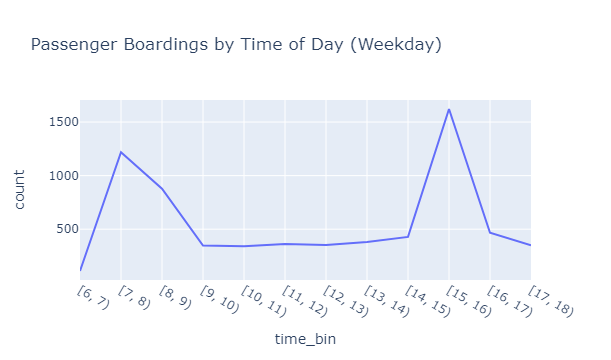

In [68]:
fig = px.line(grouped, x="time_bin", y="count", title='Passenger Boardings by Time of Day (Weekday)')
fig.show()